# Question 2: Julia Set, Area, and Fractal Dimension

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from skimage import measure

**Part a) Julia Set Generation**

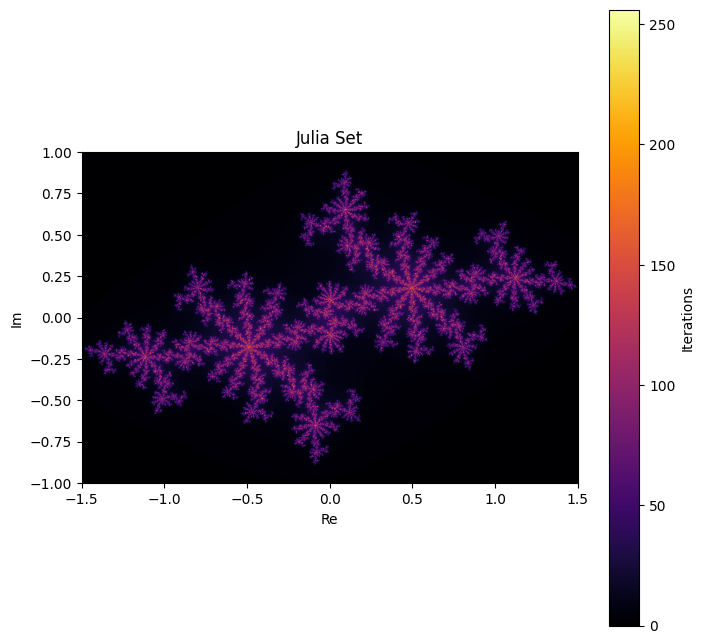

In [11]:
# Define parameters
width, height = 800, 800  # Density
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
c = complex(-0.7, 0.356)  # Julia set constant
max_iter = 256  # Maximum iterations

# Generate the grid
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Julia set iteration
def julia_iteration(z, c, max_iter):
    iteration_count = np.zeros(z.shape, dtype=int)
    mask = np.ones(z.shape, dtype=bool)
    
    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + c
        mask = np.abs(Z) < 2
        iteration_count += mask
    
    return iteration_count

julia_set = julia_iteration(Z, c, max_iter)

# Plot the Julia set
plt.figure(figsize=(8, 8))
plt.imshow(julia_set, extent=[xmin, xmax, ymin, ymax], cmap='inferno')
plt.colorbar(label='Iterations')
plt.title('Julia Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.savefig('julia_set.png')
plt.show()

**Part b) Convex Hull**

Convex Hull Area: 2.7230690428116504


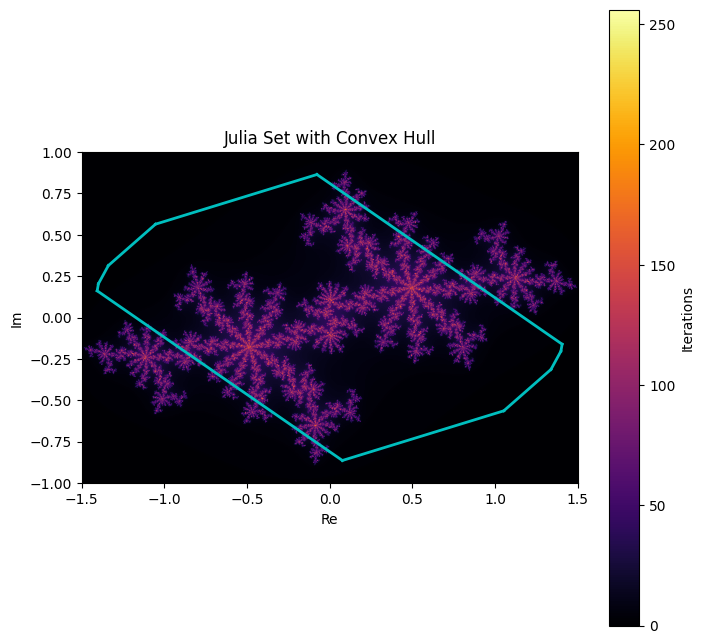

In [10]:
# Generate the grid
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Julia set iteration
def julia_iteration(z, c, max_iter):
    iteration_count = np.zeros(z.shape, dtype=int)
    mask = np.ones(z.shape, dtype=bool)
    
    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + c
        mask = np.abs(Z) < 2
        iteration_count += mask
    
    return iteration_count

julia_set = julia_iteration(Z, c, max_iter)

# Extract boundary points of the Julia set
threshold = max_iter * 0.9  # Adjust threshold for boundary points
points = np.column_stack((X[julia_set > threshold].flatten(), Y[julia_set > threshold].flatten()))

# Compute convex hull if enough points exist
if len(points) > 2:
    hull = ConvexHull(points)
    hull_area = hull.volume  # Area of the convex hull
    print(f"Convex Hull Area: {hull_area}")

    # Plot the Julia set with convex hull
    plt.figure(figsize=(8, 8))
    plt.imshow(julia_set, extent=[xmin, xmax, ymin, ymax], cmap='inferno')
    plt.colorbar(label='Iterations')
    plt.title('Julia Set with Convex Hull')
    plt.xlabel('Re')
    plt.ylabel('Im')

    # Draw the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'c-', linewidth=2)

    plt.savefig('julia_set_convex_hull.png')
    plt.show()
else:
    print("Not enough boundary points to compute the convex hull.")

**Part c) Contour**

Contour Enclosed Area: 0.0001940683158596752


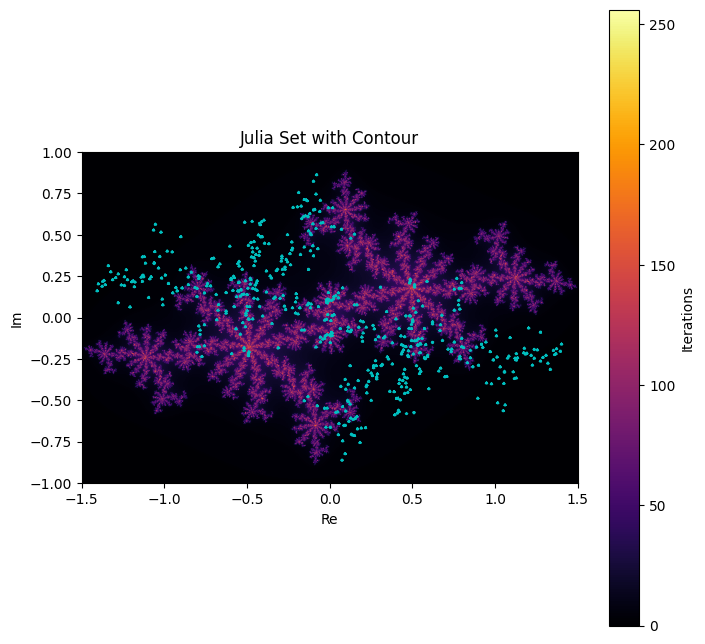

In [9]:
# Generate the grid
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Julia set iteration
def julia_iteration(z, c, max_iter):
    iteration_count = np.zeros(z.shape, dtype=int)
    mask = np.ones(z.shape, dtype=bool)
    
    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + c
        mask = np.abs(Z) < 2
        iteration_count += mask
    
    return iteration_count

julia_set = julia_iteration(Z, c, max_iter)

# Extract contour of the Julia set
contours = measure.find_contours(julia_set, level=max_iter * 0.9)

# Compute area enclosed by the contour
contour_area = 0
for contour in contours:
    x_vals = contour[:, 1] * (xmax - xmin) / width + xmin
    y_vals = contour[:, 0] * (ymax - ymin) / height + ymin
    contour_area += 0.5 * np.abs(np.dot(x_vals, np.roll(y_vals, 1)) - np.dot(y_vals, np.roll(x_vals, 1)))

print(f"Contour Enclosed Area: {contour_area}")

# Plot the Julia set with contour
plt.figure(figsize=(8, 8))
plt.imshow(julia_set, extent=[xmin, xmax, ymin, ymax], cmap='inferno')
plt.colorbar(label='Iterations')
plt.title('Julia Set with Contour')
plt.xlabel('Re')
plt.ylabel('Im')

# Draw the contour
for contour in contours:
    plt.plot(contour[:, 1] * (xmax - xmin) / width + xmin, 
             contour[:, 0] * (ymax - ymin) / height + ymin, 'c-', linewidth=2)

plt.savefig('julia_set_contour.png')
plt.show()

**Part d) Box-Counting Method**

In [8]:
# Box-counting method to estimate fractal dimension
def box_counting(binary_image, sizes):
    counts = []
    for size in sizes:
        S = binary_image.shape[0] // size
        grid = binary_image[:S*size, :S*size].reshape(S, size, S, size)
        count = np.count_nonzero(grid.sum(axis=(1, 3)))
        counts.append(count)
    return counts

sizes = np.logspace(1, np.log2(width//4), num=10, base=2, dtype=int)
binary_image = julia_set > (max_iter * 0.9)
counts = box_counting(binary_image, sizes)

coeffs = np.polyfit(np.log(1 / sizes), np.log(counts), 1)
frac_dim = -coeffs[0]
print(f"Estimated Fractal Dimension: {frac_dim}")

Estimated Fractal Dimension: -0.8116316548712286
